# <font color=#800000>410821312 張宸瑋</font>
## Homework 3
1. Input BGR images from webcam.
2. Detect your face, mouth, and eyes.
3. Input BGRA images from files "mustache.png" and "hat.png" (hint: cv2.imread("mustache.png", cv2.IMREAD_UNCHANGED) to read 4 channels)
4. Perform <b> Alpha Blending </b> to add mustache and hat on the right position and orientation of your face.
5. The overlaid mustache and hat should be translated, rotated (5pts bonus), and scaled (5pts bonus) according to the movement of your face. 
6. Show your output images.
7. Upload your Jupyter code file (*.ipynb)

In [16]:
import cv2 
import numpy as np 

#load the file of detecting face and nose (there is no need of eyes to put hat and mustache)
nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_nose.xml') 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# read the hat and mustache image
moustache = cv2.imread('mustache.png')
hat = cv2.imread('hat.png')

#for camera 
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW) 
# frame size
ds_factor = 0.8

while True: 
    ret, frame = cap.read() 
    #resize the frame 
    frame = cv2.resize(frame, None, fx=ds_factor, fy=ds_factor, interpolation=cv2.INTER_AREA) 
    # color to gray
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #detect the face and nose
    nose_rects = nose_cascade.detectMultiScale(gray, scaleFactor=1.7, minNeighbors=7) 
    face_rects = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=3)
    try:
        #for putting mustache
        for (x,y,w,h) in nose_rects:
            #adjust the place to put the mustache
            y = y - int(0.5*h)
            h = int(h*1.1)
            hh = int(1.5*h)
            hlength = hh - h
            #frame hole size to replace by the mustache
            frame_hole = frame[y+h:y+hh, x:x+w]
            #resize the mustache to fit the frame hole
            mask_small = cv2.resize(moustache, (w, hlength), interpolation=cv2.INTER_AREA)
            #make the mustache translated
            gray_mask = cv2.cvtColor(mask_small, cv2.COLOR_BGR2GRAY) 
            ret, mask = cv2.threshold(gray_mask, 180, 255, cv2.THRESH_BINARY_INV) 
            maskn = cv2.bitwise_not(mask) 
            mouth = cv2.bitwise_and(mask_small, mask_small, mask=mask) 
            masked_frame = cv2.bitwise_and(frame_hole, frame_hole, mask=maskn)
            #add the translated mustache on the frame
            frame[y+h:y+hh, x:x+w] = cv2.add(mouth, masked_frame) 
            
        #for putting hat   
        for (x,y,w,h) in face_rects: 
            #adjust the place to put the hat
            y = int(y-h*0.7) if y-h*0.7>0 else 0
            w = int(w*1.2)
            h = int(h*0.9)
            x = int(x*0.85)
            #frame hole size to replace by the hat
            frame_hole = frame[y:y+h, x:x+w] 
            #resize the hat to fit the frame hole
            mask_small = cv2.resize(hat, (w, h), interpolation=cv2.INTER_AREA) 
            #make the hat translated
            gray_mask = cv2.cvtColor(mask_small, cv2.COLOR_BGR2GRAY) 
            ret, mask = cv2.threshold(gray_mask, 250, 255, cv2.THRESH_BINARY_INV) 
            maskn = cv2.bitwise_not(mask) 
            face = cv2.bitwise_and(mask_small, mask_small, mask=mask) 
            masked_frame = cv2.bitwise_and(frame_hole, frame_hole, mask=maskn) 
            #add the translated hat on the frame
            frame[y:y+h, x:x+w] = cv2.add(face, masked_frame) 
    except:
        pass
    #show the output
    cv2.imshow('Output', frame)
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
#end 
cap.release() 
cv2.destroyAllWindows()

## <font color=#800000>Report</font>


### Step1. Detect face and mouth
- Since we already had the model for detecting face, mouth, nose and eyes.For example, if I want to detect my face, face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') will do it.
- Thy way I decide where to put the mustache and hat only depands on the face and nose detection, so mouth is not used in my code.<br>
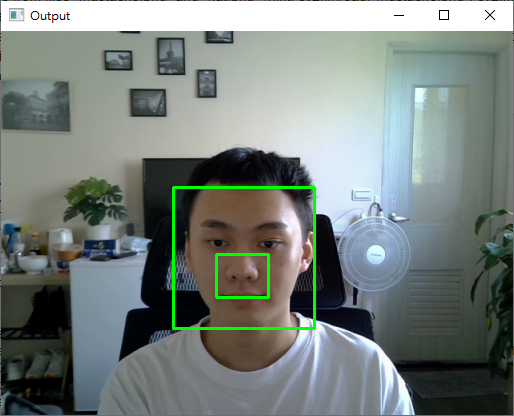<br>

### Step2. Adjust the position for putting mustache and hat
- In step one, we find out the x,y,w,h value for face and nose.
- Now we need to adjust this value to determine where should we put the hat and mustache.
- Below picture is the place that should add the hat and mustache.<br>
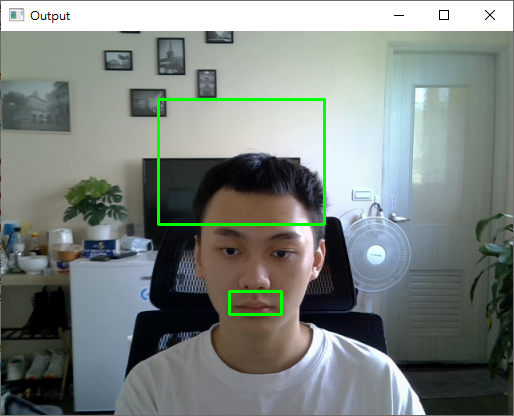<br>

### Step3. Put the mustache and hat to the frame(Translated and scaled)
- We already find out the position to put the mustache and hat, so now we only need to add them on the rigth position
- Since the picture has the white background, we need to use threshold to remove the background to make it translated.
- As for scaled, since the size of the picture is determine by the x,y,w,h value, when moving your face, the mustache and hat will scaled automaticly due to the x,y,w,h while detecting face and nose.<br>

#### Different size of mustache and hat
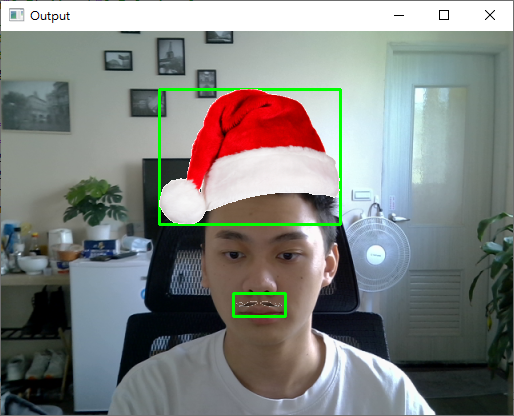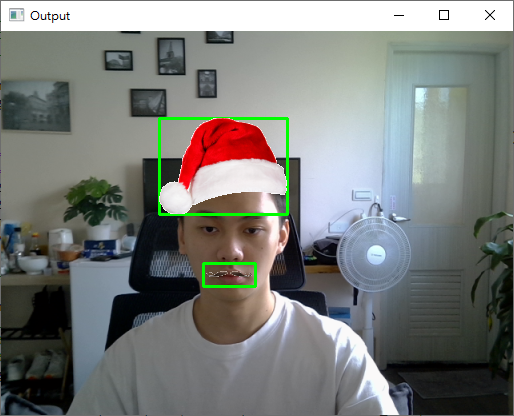<br>

### Step4. Remove the green rectangle
- Last, remove the green rectangle and left only the mustache and hat.<br>
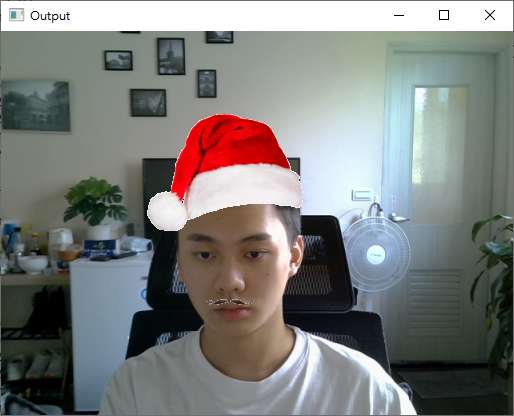

### Encounter problem
- At first, I didn't adjust the picture size to fit the size where I intended to replace on the original frame, so the program crashed at the very beginning since the replacement size is different from the replacement picture.
- Finding the right position for putting the hat and the mustache also takes me a lot of time.










